# Can We Predict The Star Type

With ML techniques, we can categorize the stars between main sequence stars and giants.

* Tasks you can do:
1. Preprocess the Data
    - Clean the Data (Null values, Errored values)
    - Create Amag column via the equation
    - Create a label column via SpType
    
    
2. Analysis and Predict Star Type
    - Try with Logistic Regression and create a decision boundary
    - Performing deep neural network and create a decision boundary

#### Amag = Absolute Magnitude = Mv


# Equation :

Mv = m - 2.5 log[(d/10)2]

# 1. Process the Data 

#### Imporing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading dataset

In [3]:
raw = pd.read_csv('../Project 6/Star99999_raw.csv')

#### Exploring dataset

In [4]:
raw.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


#### Columns:

Vmag - Visual Apparent Magnitude of the Star (m)

Plx - Distance Between the Star and the Earth (d)

e_Plx - Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

B-V - B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)

SpType - Stellar classification. (Roman Numerals >IV are giants. Otherwise are dwarfs)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


# - Data Cleaning

#### converting object type columns to numeric

In [15]:
raw.Vmag = pd.to_numeric(raw.Vmag, downcast='float', errors ='coerce')
raw.Plx = pd.to_numeric(raw.Plx, downcast='float', errors ='coerce')
raw.e_Plx = pd.to_numeric(raw.e_Plx, downcast='float', errors ='coerce')
raw['B-V'] = pd.to_numeric(raw['B-V'], downcast='float', errors ='coerce')

In [16]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99999 non-null  int64  
 1   Vmag        99998 non-null  float32
 2   Plx         99768 non-null  float32
 3   e_Plx       99768 non-null  float32
 4   B-V         98871 non-null  float32
 5   SpType      97377 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.1+ MB


In [18]:
raw.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99999.0,49999.000,28867.369,0.00,24999.500,49999.000,74998.500,99998.00
Vmag,99998.0,8.370,1.314,-1.44,7.640,8.440,9.140,14.08
Plx,99768.0,7.212,11.349,-54.95,2.510,4.630,8.410,772.33
e_Plx,99768.0,1.365,1.817,0.38,0.880,1.100,1.390,114.46
B-V,98871.0,0.705,0.490,-0.40,0.348,0.612,1.075,5.46


#### Checking for missing values

In [19]:
raw.isnull().sum()

Unnamed: 0       0
Vmag             1
Plx            231
e_Plx          231
B-V           1128
SpType        2622
dtype: int64

In [26]:
raw.shape

(99999, 6)

In [25]:
np.product(raw.shape)

599994

#### What is the % of the missing data

In [44]:
total_cells = np.product(raw.shape)
total_missing = raw.isnull().sum().sum()
percent_missing = (total_missing/total_cells)* 100

In [47]:
print(f'Missing data equals: {round(percent_missing,2)}%' )

Missing data equals: 0.7%


#### Pourcentage insignificant, so lets drop it those rows

In [48]:
raw_missing_removed = raw.dropna()

In [71]:
raw_missing_removed.shape

(96742, 5)

In [49]:
raw_missing_removed.isnull().sum()

Unnamed: 0    0
Vmag          0
Plx           0
e_Plx         0
B-V           0
SpType        0
dtype: int64

#### How many rows did we dropped?

In [60]:
dropped_rows = raw.shape[0] - raw_missing_removed.shape[0]

In [61]:
print(f'We dropped : {dropped_rows} rows')

We dropped : 3257 rows


#### What is the pourcentage of this amount? 

In [62]:
pourcentage_dropped_rows = ((raw.shape[0] - raw_missing_removed.shape[0])/raw.shape[0])*100

In [63]:
print(f'Dropped rows equals : {round(pourcentage_dropped_rows,2)} %')

Dropped rows equals : 3.26 %


#### Checking for duplicated

In [65]:
raw_missing_removed.duplicated().sum()

0

#### But after dropping so many rows our index must be weird

#### Let's ReIndex it

In [78]:
raw_missing_removed.reset_index(drop=True, inplace = True)

In [83]:
raw_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B-V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


#### Are there any useless columns?

In [79]:
raw_missing_removed.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


In [80]:
raw_missing_removed.tail()

,Vmag,Plx,e_Plx,B-V,SpType
96737,7.92,3.93,1.24,0.133,Am...
96738,8.72,3.07,0.87,0.097,B3
96739,8.08,1.07,0.68,1.094,G5
96740,6.98,2.97,0.76,-0.143,B1.5V
96741,8.51,-1.18,1.34,1.568,K5/M0III


### Unnamed: 0 is a index columns :

but we already have it so let's dropt it


In [75]:
raw_missing_removed.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [76]:
raw_missing_removed.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


# Data Cleaned - Let's Create Amag column via the equation

Mv = m - 2.5 log[(d/10)2]


### Equation asks for log of Plx(d) (which is the distance between the star and the Earth)

### But log of 0 is infinite and we can't use it

So let's not consider theses rows

In [84]:
raw_missing_removed = raw_missing_removed.query('Plx != 0')

In [85]:
raw_missing_removed

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
96737,7.92,3.93,1.24,0.133,Am...
96738,8.72,3.07,0.87,0.097,B3
96739,8.08,1.07,0.68,1.094,G5
96740,6.98,2.97,0.76,-0.143,B1.5V


In [87]:
raw_missing_removed.reset_index(drop = True, inplace = True)

In [88]:
raw_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96707 non-null  float32
 1   Plx     96707 non-null  float32
 2   e_Plx   96707 non-null  float32
 3   B-V     96707 non-null  float32
 4   SpType  96707 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


#### Let's Calculate the Amag Value

In [89]:
df = raw_missing_removed

In [94]:
df['Amag'] = df.Vmag + 5 *(np.log10(abs(df.Plx))+1)

<ipython-input-94-c9e18af25f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amag'] = df.Vmag + 5 *(np.log10(abs(df.Plx))+1)


In [95]:
df.Amag

0        16.845016
1        20.972221
2        13.853531
3        17.506508
4        15.839410
           ...    
96702    15.891963
96703    16.155693
96704    13.226919
96705    14.343782
96706    13.869411
Name: Amag, Length: 96707, dtype: float32

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96707 non-null  float32
 1   Plx     96707 non-null  float32
 2   e_Plx   96707 non-null  float32
 3   B-V     96707 non-null  float32
 4   SpType  96707 non-null  object 
 5   Amag    96707 non-null  float32
dtypes: float32(5), object(1)
memory usage: 2.6+ MB


### Display Star Classification

In [156]:
from IPython.display import Image, display
from PIL import Image


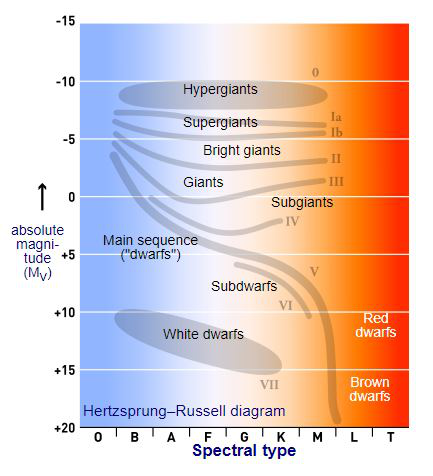

In [158]:
path="Project 6/image.jpg"
display(Image.open('../Project 6/Star_Classification.JPG'))

# - Create a label column via SpType

In [161]:
df.SpType.value_counts()

K0             7321
G5             5358
F8             3827
A0             3804
G0             3754
               ... 
B8p...            1
B0II-III          1
B9.5Vs            1
G8/K1 + F/G       1
S4,2e             1
Name: SpType, Length: 3703, dtype: int64

In [162]:
def label_gen_stars(star):
    dwarf = ['D','VI', 'VII', 'V']
    giant = ['III', 'II', 'Ib', 'Ia', 'Ia-O']
    for i in dwarf :
        if i in star:
            return 'Dwarf'
    for i in giant:
        if i in star:
            return 'Giant'
    return 'Other'
    

In [163]:
df['Star_Size'] = df.SpType.apply(label_gen_stars)

<ipython-input-163-4116d8433e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Star_Size'] = df.SpType.apply(label_gen_stars)


In [164]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Star_Size
0,9.10,3.54,1.39,0.482,F5,16.845016,Other
1,9.27,21.90,3.10,0.999,K3V,20.972221,Dwarf
2,6.61,2.81,0.63,-0.019,B9,13.853531,Other
3,8.06,7.75,0.97,0.370,F0V,17.506508,Dwarf
4,8.55,2.87,1.11,0.902,G8III,15.839410,Giant


In [166]:
df.isnull().sum()

Vmag         0
Plx          0
e_Plx        0
B-V          0
SpType       0
Amag         0
Star_Size    0
dtype: int64

In [173]:
df.loc[df.SpType.str.contains('D')]

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Star_Size
3705,12.37,226.949997,5.35,0.554,DG,29.149651,Dwarf
5179,12.23,1.080000,3.12,-0.230,DA:,17.397118,Dwarf
8413,12.44,63.080002,3.79,0.170,DAs,26.439457,Dwarf
9924,9.94,11.230000,1.85,0.673,DF,20.191898,Dwarf
11249,6.50,9.390000,0.92,0.294,DAn...,16.363327,Dwarf
11256,12.79,41.150002,4.96,-0.056,DA,25.861851,Dwarf
11623,12.41,13.440000,3.62,-0.201,DAwe...,23.051996,Dwarf
14244,11.39,98.500000,1.46,0.025,DA,26.357182,Dwarf
17320,9.46,21.370001,1.62,0.782,K0Vea + DA,21.109022,Dwarf
18834,9.22,2.480000,0.73,0.398,Fm delta Del,16.192259,Dwarf


In [174]:
df.Star_Size.value_counts()

Other    49196
Dwarf    27752
Giant    19759
Name: Star_Size, dtype: int64

#### Get dummies